# **This project uses KNN to classify drugs types**

# Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data

In [29]:
df = pd.read_csv('drug200.csv')

# Check the head of the dataframe

In [30]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Visualize the original data

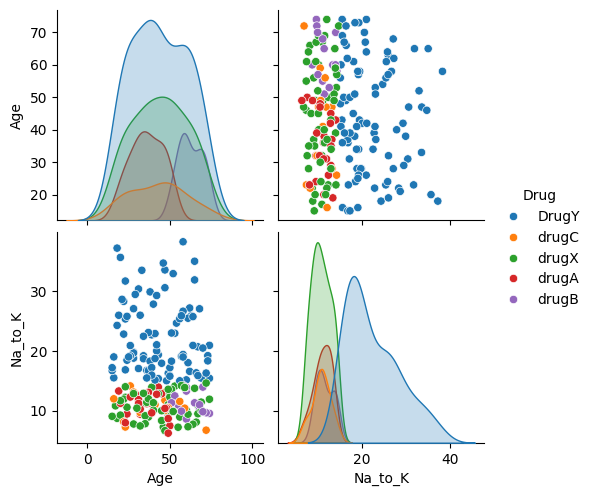

In [31]:
sns.pairplot(df, hue = 'Drug')

# Encode text variables

In [33]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variable
df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['BP_encoded'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol_encoded'] = label_encoder.fit_transform(df['Cholesterol'])

df1 = df.drop(columns=['Sex','BP','Cholesterol'])

# Visualize the new data

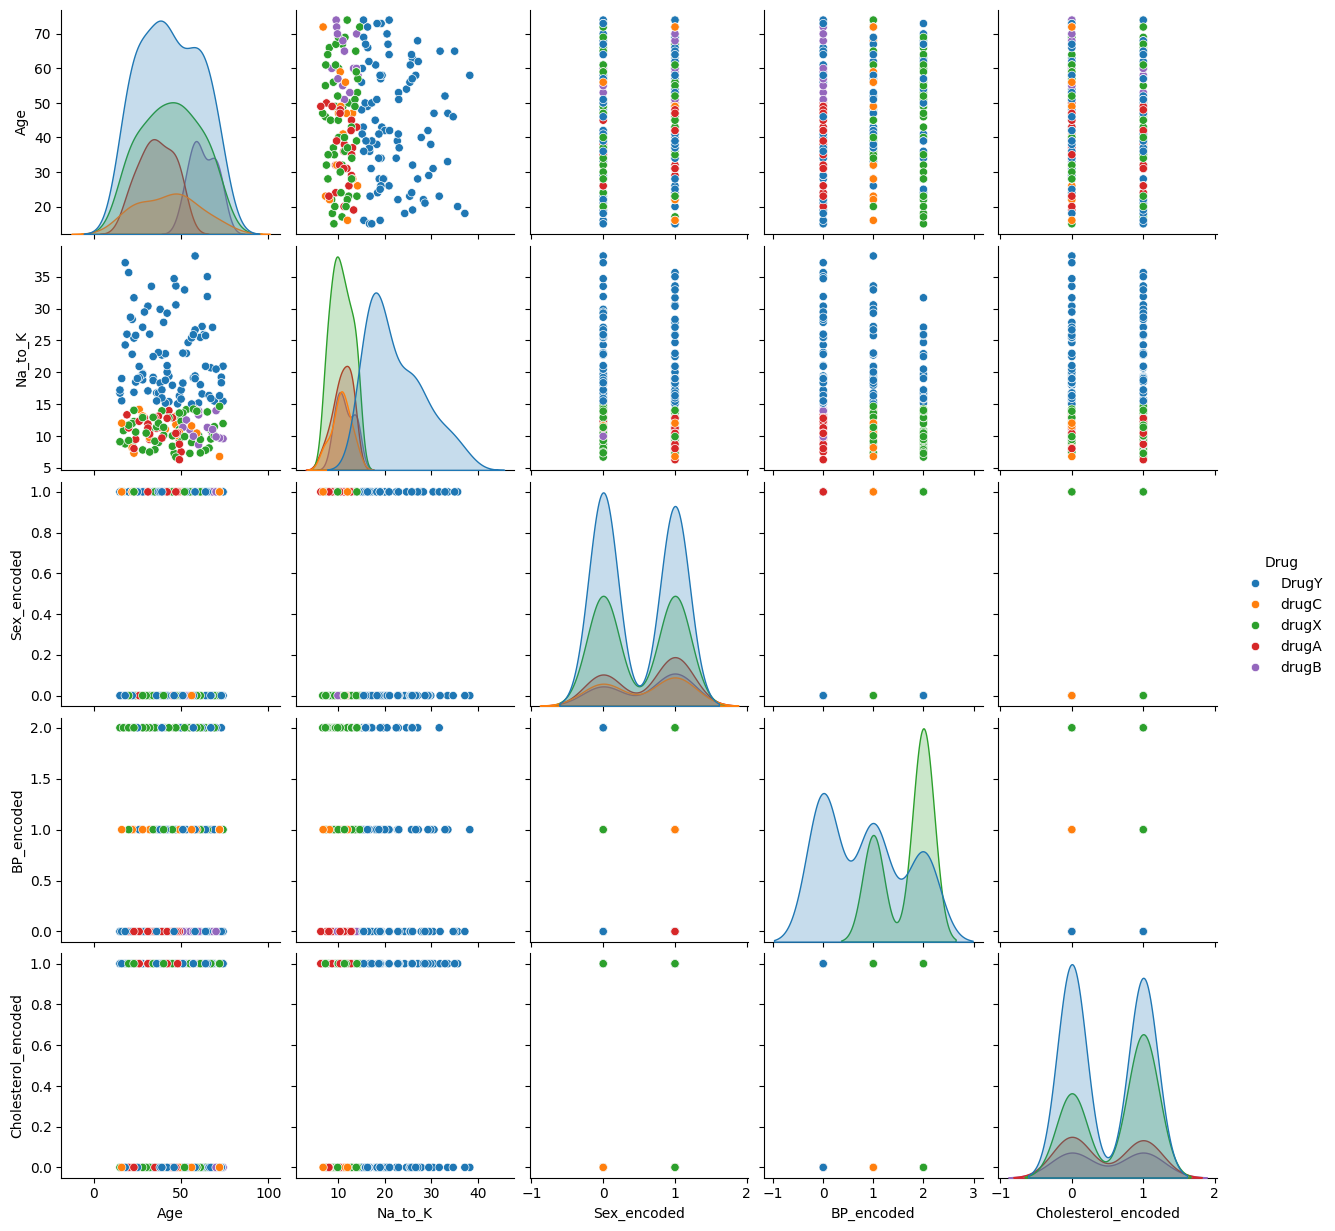

In [36]:
sns.pairplot(df1, hue = 'Drug')

# Standardize the Variables

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [54]:
scaler.fit(df1.drop('Drug', axis = 1))

StandardScaler()

In [42]:
scaled_features = scaler.transform(df1.drop('Drug',axis =1))

In [43]:
df_feat = pd.DataFrame(data=scaled_features,columns=df1.columns.drop('Drug'))
df_feat.head()

,Age,Na_to_K,Sex_encoded,BP_encoded,Cholesterol_encoded
0,-1.291591,1.286522,-1.040833,-1.110169,-0.970437
1,0.162699,-0.415145,0.960769,0.109797,-0.970437
2,0.162699,-0.828558,0.960769,0.109797,-0.970437
3,-0.988614,-1.149963,-1.040833,1.329763,-0.970437
4,1.011034,0.271794,-1.040833,0.109797,-0.970437


# Train Test Split

In [44]:
X = df_feat
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)

Fit KNN model to the training data

In [47]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

In [48]:
predictions = knn.predict(X_test)

# Confusion matrix and classification report

In [49]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[20  3  1  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 4  0  0  0 17]]
              precision    recall  f1-score   support

       DrugY       0.83      0.83      0.83        24
       drugA       0.67      1.00      0.80         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      0.81      0.89        21

    accuracy                           0.87        60
   macro avg       0.85      0.93      0.88        60
weighted avg       0.89      0.87      0.87        60



# Optimizing K value using elbow method

In [50]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

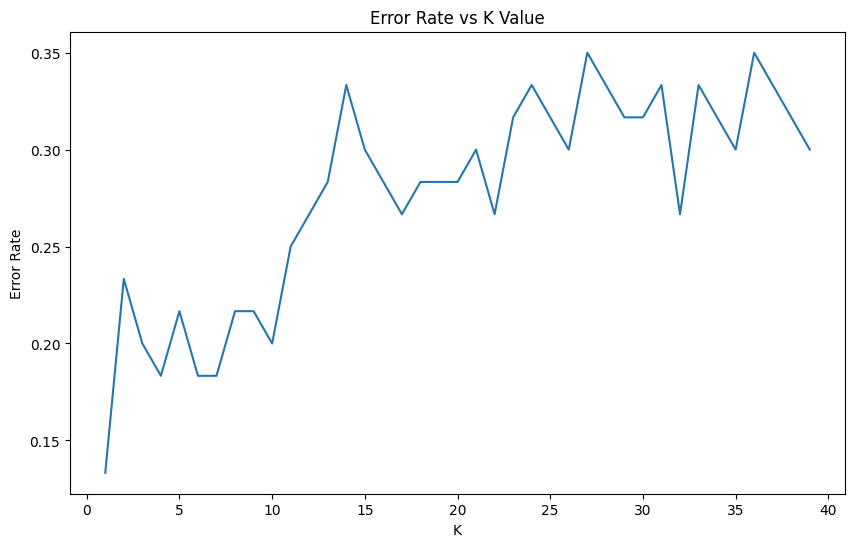

In [51]:
plt.figure(figsize = (10,6))

plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As K = 1 had lowest error, we will retain this value for the final model

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[20  3  1  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 4  0  0  0 17]]
              precision    recall  f1-score   support

       DrugY       0.83      0.83      0.83        24
       drugA       0.67      1.00      0.80         6
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      0.81      0.89        21

    accuracy                           0.87        60
   macro avg       0.85      0.93      0.88        60
weighted avg       0.89      0.87      0.87        60

